## Feature Scaling

The scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

=================================================================

## Scaling to vector unit  length / unit norm

In this procedure we scale the components of a feature vector such that the complete vector has a length of 1 or, in other words a norm of 1. **Note** that this normalisation procedure normalises the **feature** vector, and not the **observation** vector. So we divide by the norm of the feature vector, observation per observation, across the different variables, and not by the norm of the **observation** vector, across observations for the same feature.


### Scaling to unit norm, formulas

Scaling to unit norm is achieved by dividing each feature vector by either the Manhattan distance (l1 norm) or the Euclidean distance of the vector (l2 norm):

X_scaled_l1 = X / l1(X)

X_scaled_l2 = X / l2(X)


The **Manhattan distance** is given by the sum of the absolute components of the vector:

l1(X) = |x1| + |x2| + ... + |xn|


Whereas the **Euclidean distance** is given by the square root of the squared sum of the components of the vector:

l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )


In the above example, x1 is variable 1, x2 variable 2, and xn variable n, and X is the data for 1 observation across variables (a row in other words).

**Note** as well that as the euclidean distance squares the values of the feature vector components, outliers have a heavier weight. With outliers, we may prefer to use l1 normalisation.


### Scaling to unit norm, examples

For example, if our data has 1 observations (1 row) and 3 variables:

- number of pets
- number of children
- age

The values for each variable for that single observation are 10, 15 and 20. Our vector X = [10, 15, 20]. Then:

l1(X) = 10 + 15 + 20 = 45

l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**

The euclidean distance is always smaller than the manhattan distance.


The normalised vector values are therefore:

X_scaled_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]

X_scaled_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]


Scikit-learn recommends this scaling procedures for text classification or clustering. For example, they quote the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.


## In this demo

We will perform scaling to unit length using the Boston House Prices data set that comes with Scikit-learn

In [119]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

from sklearn.preprocessing import Normalizer

In [120]:
# load dataset
boston = load_boston()
boston

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [121]:
# convert it into a DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)

data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [122]:
# describe 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Scaling to Unit Length

### Scaling to L1 

In [123]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis = 1),
                                                   data['MEDV'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [124]:
# initialize the Normalizer Object
scaler = Normalizer(norm='l1')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform the train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# let's calculate the norm for each observation (feature vector)
# original data

np.round( np.linalg.norm(X_train, ord=1, axis=1), 1)

array([1024.1,  744. , 1003.5,  858. ,  732.4,  859.3,  845.9,  847. ,
        888.1,  826.7,  705.9,  808.9,  734. ,  784.6,  785.1,  819.6,
       1212.9, 1258. ,  757.6, 1223. , 1236.1,  890.2, 1166.8, 1270. ,
        919. ,  925.9, 1197. ,  770.3, 1118. ,  886.7,  719. ,  952. ,
        933.4,  745. ,  805.6,  825.1,  678.5,  947.7,  910. ,  816. ,
        769.1,  832.4,  763.5,  777. ,  850.4, 1137.7,  802.1,  703.4,
        802.6,  688. ,  801.8,  877.3,  753.8,  912.4,  936.7,  813.6,
       1194. ,  771.9,  739.5,  825.9,  890.8,  891.6,  844.4,  927.1,
        998.6,  903.3, 1250.3,  739.5, 1095.3,  857.7,  834.8,  738.4,
        855.1, 1238.4,  828.6,  958.4,  775. ,  923.4,  859.6,  830.7,
        782.3,  796.8,  953.2,  857.9, 1249.9,  716.7,  803.9,  978.8,
       1186.9,  904. , 1238.2,  981.6,  884.9,  924.9,  694.1,  725.2,
        832.4,  717.7,  917. , 1263.9,  836.7,  813.5,  992.5,  823.4,
       1224.3,  712.1,  841.2,  950.3,  702.6,  791.9,  830.4,  742.1,
      

In [126]:
# let's calculate the norm for each observation (feature vector)
# transformed data

np.round( np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Now, each feature vector has a l1 norm of 1.

In [127]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [133]:
# let's have a look at the original training dataset: 
# I use np.round to reduce the number of decimals to 1.

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.358284,8.353223,0.00632,0.073425,0.26266,3.10370,88.9762
ZN,354.0,11.809322,23.653056,0.00000,0.000000,0.00000,20.00000,100.0000
INDUS,354.0,11.078757,6.993821,0.46000,4.950000,8.56000,18.10000,27.7400
CHAS,354.0,0.064972,0.246825,0.00000,0.000000,0.00000,0.00000,1.0000
NOX,354.0,0.556098,0.115601,0.38500,0.450000,0.53800,0.62925,0.8710
RM,354.0,6.308427,0.702009,3.56100,5.895250,6.21550,6.64725,8.7800
AGE,354.0,68.994068,28.038429,2.90000,45.175000,79.45000,93.75000,100.0000
DIS,354.0,3.762459,2.067661,1.17420,2.107650,3.21570,5.07930,12.1265
RAD,354.0,9.353107,8.671999,1.00000,4.000000,5.00000,24.00000,24.0000
TAX,354.0,401.782486,170.592404,187.00000,276.000000,311.00000,666.00000,711.0000


In [132]:
# let's have a look at the scaled training dataset: 
# I use np.round to reduce the number of decimals to 1.

X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,0.003022,0.007018,0.000008,0.000093,0.000311,0.002983,0.066782
ZN,354.0,0.014491,0.028764,0.000000,0.000000,0.000000,0.024709,0.121905
INDUS,354.0,0.011731,0.006854,0.000577,0.006243,0.010421,0.015120,0.035787
CHAS,354.0,0.000073,0.000283,0.000000,0.000000,0.000000,0.000000,0.001422
NOX,354.0,0.000620,0.000115,0.000424,0.000545,0.000611,0.000657,0.001337
RM,354.0,0.007221,0.001620,0.002996,0.006061,0.007376,0.008358,0.011541
AGE,354.0,0.075687,0.029466,0.004348,0.055411,0.078917,0.098186,0.144310
DIS,354.0,0.004479,0.002780,0.000919,0.002206,0.003923,0.006456,0.016269
RAD,354.0,0.009336,0.007262,0.001163,0.004740,0.006021,0.018223,0.028684
TAX,354.0,0.427642,0.114922,0.250885,0.346035,0.393483,0.526258,0.795970


The values have been squeezed in a smaller value range.

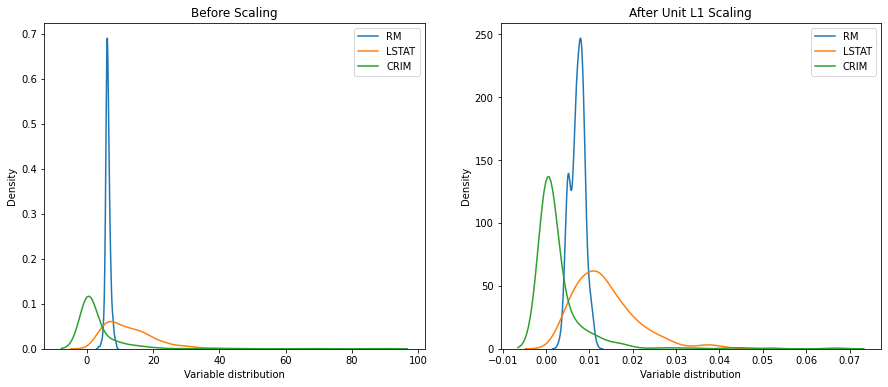

In [135]:
# lets check and compare the variable distribution before and after scaling

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.kdeplot(X_train['RM'], label='RM')
sns.kdeplot(X_train['LSTAT'],label='LSTAT')
sns.kdeplot(X_train['CRIM'],label='CRIM')
plt.xlabel('Variable distribution')
plt.legend(loc='best')
plt.title('Before Scaling')


plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled['RM'],label='RM')
sns.kdeplot(X_train_scaled['LSTAT'],label='LSTAT')
sns.kdeplot(X_train_scaled['CRIM'],label='CRIM')
plt.xlabel('Variable distribution')
plt.legend(loc='best')
plt.title('After Unit L1 Scaling')

plt.show();

The median of the distributions are centered at zero, but every other parameter may vary in the different variables. It does, though, squeeze the value range in the original variables, particularly for those highly skewed, like CRIM.

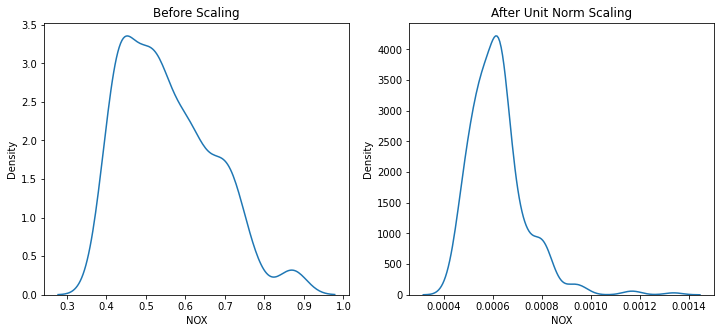

In [136]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
#sns.kdeplot(X_train['AGE'], ax=ax1)
#sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Unit Norm Scaling')
#sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
#sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

See how this normalisation changes the distribution of the original variable quite dramatically.

### Scaling to L2

In [137]:
scaler = Normalizer(norm = 'l2')

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
# checking the norm for each observations (feature vector)
# original data 
# ord=2 for L2

np.round(np.linalg.norm(X_train, ord=2, axis = 1),1)

array([600.5, 458.4, 598. , 519.1, 434. , 511. , 527.9, 496.7, 675.2,
       496.5, 450.2, 492.1, 453.5, 492.4, 492.9, 491.5, 770.1, 782.2,
       465.2, 759.8, 778.6, 535.3, 764.4, 781.5, 561.9, 562.8, 768.1,
       468.2, 725.5, 673.1, 458.8, 572.5, 559.8, 488. , 490.2, 488.9,
       441.3, 680.4, 675.6, 483.9, 483.9, 506.2, 474.8, 481.9, 517.8,
       747.8, 503.3, 438.2, 483. , 424. , 478.8, 519.9, 451.4, 546.2,
       558.3, 516.9, 773.8, 470.4, 467.5, 501.6, 674.5, 528.1, 508.2,
       677.1, 593.2, 556.5, 781.9, 465.9, 707.6, 509.6, 501.3, 449.4,
       512.5, 778.8, 483.6, 587.7, 485.4, 558.1, 673.1, 504.6, 494.9,
       509. , 589.2, 510.6, 777. , 439.2, 478.8, 593.3, 760. , 534.5,
       779.9, 586.6, 551.3, 558.4, 446.2, 418.8, 496. , 407.8, 676.2,
       782.8, 671. , 499. , 593.6, 482.6, 779.2, 456.1, 483.4, 573.4,
       456.5, 477.3, 493.3, 485.7, 490.5, 716.1, 497.2, 760.6, 524.9,
       672.1, 488.2, 443.7, 751. , 492.5, 424.3, 458.7, 783. , 596.4,
       482.9, 557.2,

In [140]:
# checking the norm for each observations (feature vector)
# transformed data 
# ord=2 for L2

np.round(np.linalg.norm(X_train_scaled, ord=2, axis = 1),1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [141]:
# ocnvert it into Dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [143]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.358284,8.353223,0.00632,0.073425,0.26266,3.10370,88.9762
ZN,354.0,11.809322,23.653056,0.00000,0.000000,0.00000,20.00000,100.0000
INDUS,354.0,11.078757,6.993821,0.46000,4.950000,8.56000,18.10000,27.7400
CHAS,354.0,0.064972,0.246825,0.00000,0.000000,0.00000,0.00000,1.0000
NOX,354.0,0.556098,0.115601,0.38500,0.450000,0.53800,0.62925,0.8710
RM,354.0,6.308427,0.702009,3.56100,5.895250,6.21550,6.64725,8.7800
AGE,354.0,68.994068,28.038429,2.90000,45.175000,79.45000,93.75000,100.0000
DIS,354.0,3.762459,2.067661,1.17420,2.107650,3.21570,5.07930,12.1265
RAD,354.0,9.353107,8.671999,1.00000,4.000000,5.00000,24.00000,24.0000
TAX,354.0,401.782486,170.592404,187.00000,276.000000,311.00000,666.00000,711.0000


In [144]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,0.004688,0.011049,0.000013,0.000148,0.000515,0.004750,0.113081
ZN,354.0,0.024027,0.048105,0.000000,0.000000,0.000000,0.041516,0.207644
INDUS,354.0,0.018758,0.010982,0.000963,0.010430,0.016919,0.023812,0.061249
CHAS,354.0,0.000120,0.000463,0.000000,0.000000,0.000000,0.000000,0.002282
NOX,354.0,0.000997,0.000187,0.000681,0.000883,0.000979,0.001060,0.002053
RM,354.0,0.011640,0.002718,0.004682,0.009432,0.012099,0.013580,0.018156
AGE,354.0,0.122166,0.048931,0.006431,0.088582,0.126282,0.158637,0.237626
DIS,354.0,0.007251,0.004588,0.001499,0.003363,0.006399,0.010516,0.027624
RAD,354.0,0.014647,0.010624,0.001911,0.007875,0.010027,0.030581,0.035766
TAX,354.0,0.682156,0.152037,0.425977,0.565434,0.639890,0.850914,0.992514


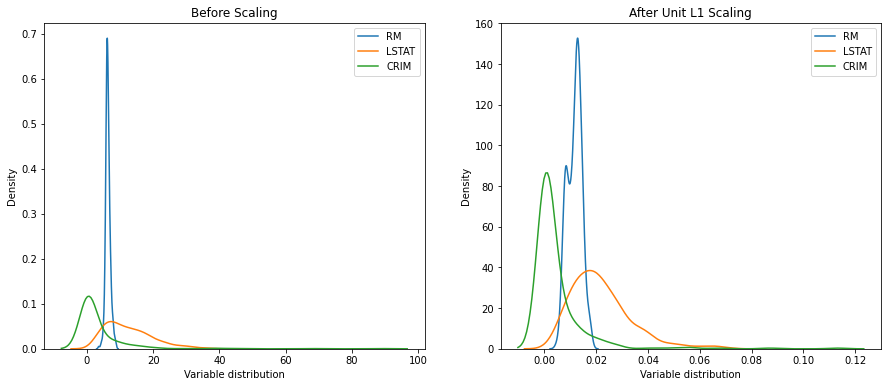

In [146]:
# lets check and compare the variable distribution before and after scaling

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.kdeplot(X_train['RM'], label='RM')
sns.kdeplot(X_train['LSTAT'],label='LSTAT')
sns.kdeplot(X_train['CRIM'],label='CRIM')
plt.xlabel('Variable distribution')
plt.legend(loc='best')
plt.title('Before Scaling')


plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled['RM'],label='RM')
sns.kdeplot(X_train_scaled['LSTAT'],label='LSTAT')
sns.kdeplot(X_train_scaled['CRIM'],label='CRIM')
plt.xlabel('Variable distribution')
plt.legend(loc='best')
plt.title('After Unit L1 Scaling')

plt.show();

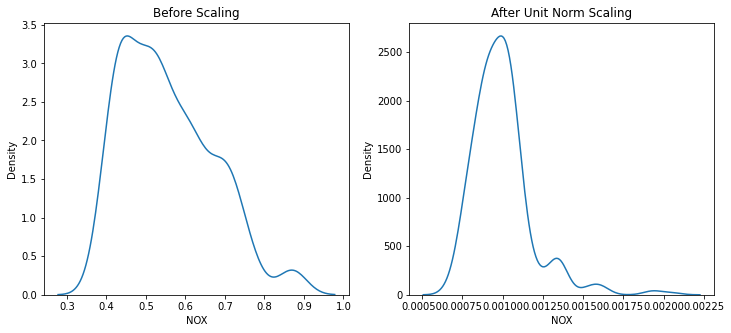

In [147]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
#sns.kdeplot(X_train['AGE'], ax=ax1)
#sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Unit Norm Scaling')
#sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
#sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

In [148]:
X_train['AGE'].min(), X_train['AGE'].max(), 

(2.9, 100.0)

In [149]:
X_train['NOX'].min(), X_train['NOX'].max(), 

(0.385, 0.871)

In the above plot, we can see how, by scaling, the variable NOX, which varied across a very narrow range of values [0-1], and AGE which varied across [0-100], now spread over a more homogeneous range of values, so that we can compare them directly in one plot, whereas before it was difficult. In a linear model, AGE would dominate the output, but after standardisation, both variables will be able to have an input (assuming that they are both predictive).  

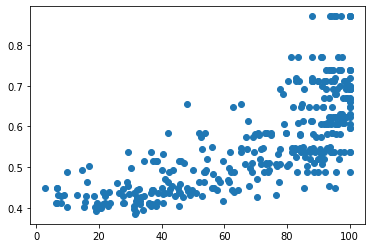

In [150]:
plt.scatter(X_train['AGE'], X_train['NOX'])

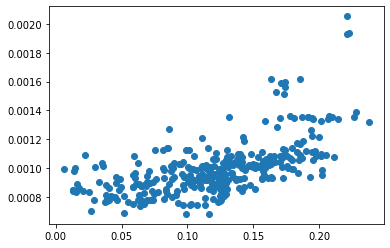

In [151]:
plt.scatter(X_train_scaled['AGE'], X_train_scaled['NOX'])

- We can see that the feature relationship is now more homogenous
- Also, We can see in the scatter plot, the distribution of the variables changes after the transformation
